# Intro

Here we use ADS query API to get all the academic paper with a particualar word in it: "Delensing". 

Essential packages:

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
from PIL import Image
import ads
plt.rcParams['figure.figsize'] = (17,10)
plt.rcParams['axes.labelsize'] = 40
plt.rcParams.update({'font.size': 22})
sns.set_context("notebook", rc={"font.size":38,"axes.titlesize":38,"axes.labelsize":35,"xticks.labelsize":35,"yticks.labelsize":35})   
ads.config.token = 'xxBcVz8nkzBNt4kqmEW3ySv1cxTJQpeCmm68c4Sj'

Let's query:

In [7]:
papers = list(ads.SearchQuery(full = 'delensing', max_pages=100, rows=50000))

/Users/alessandromanzotti/miniconda2/lib/python2.7/site-packages/ads/search.py:544: UserWarning: Response rows did not match input rows. Setting this query's rows to 2000
  "Setting this query's rows to {}".format(self.query['rows']))


quickly print the title of the papers found to check everything was ok

In [8]:
for paper in papers:
    print(paper.title)

[u'Delensing the CMB with the cosmic infrared background']
[u'Internal delensing of Planck CMB temperature and polarization']
[u'Delensing CMB polarization with external datasets']
[u'CMB Delensing Beyond the B Modes']
[u'CMB Polarization B-mode Delensing with SPTpol and Herschel']
[u'Non-Gaussian structure of B-mode polarization after delensing']
[u'Demonstration of Cosmic Microwave Background Delensing Using the Cosmic Infrared Background']
[u'Internal delensing of cosmic microwave background acoustic peaks']
[u'Prospects for Delensing the Cosmic Microwave Background for Studying Inflation']
[u'Cosmic Microwave Background Delensing Revisited: Residual Biases and a Simple Fix']
[u'Detectability of CMB tensor B modes via delensing with weak lensing galaxy surveys']
[u'Delensing gravitational wave standard sirens with shear and flexion maps']
[u'Delensing cosmic microwave background B modes with the Square Kilometre Array Radio Continuum Survey']
[u'Delensing galaxy surveys']
[u'Multi-t

limit_output extension: Maximum message size of 10000 exceeded with 20514 characters

Ok they make sense

Now we will organize them a little better by creatin lists of years titles etc.
The journals steps for some reason takes more time than the others!

In [18]:
years = []
title = []
journals = []
authors =[]
for paper in papers:
    years.append(paper.year)
    title.append(paper.title)
    authors.append(paper.author)
    journals.append(paper.pub)
#     years.append(paper.years)

# un-nest the list
title = [y for x in title for y in x]

In [25]:
authors = [y for x in authors for y in x]

In [26]:
authors

[u'Sherwin, Blake D.',
 u'Schmittfull, Marcel',
 u'Carron, Julien',
 u'Lewis, Antony',
 u'Challinor, Anthony',
 u'Smith, Kendrick M.',
 u'Hanson, Duncan',
 u'LoVerde, Marilena',
 u'Hirata, Christopher M.',
 u'Zahn, Oliver',
 u'Green, Daniel',
 u'Meyers, Joel',
 u'van Engelen, Alexander',
 u'Manzotti, A.',
 u'Story, K. T.',
 u'Wu, W. L. K.',
 u'Austermann, J. E.',
 u'Beall, J. A.',
 u'Bender, A. N.',
 u'Benson, B. A.',
 u'Bleem, L. E.',
 u'Bock, J. J.',
 u'Carlstrom, J. E.',
 u'Chang, C. L.',
 u'Chiang, H. C.',
 u'Cho, H. -M.',
 u'Citron, R.',
 u'Conley, A.',
 u'Crawford, T. M.',
 u'Crites, A. T.',
 u'de Haan, T.',
 u'Dobbs, M. A.',
 u'Dodelson, S.',
 u'Everett, W.',
 u'Gallicchio, J.',
 u'George, E. M.',
 u'Gilbert, A.',
 u'Halverson, N. W.',
 u'Harrington, N.',
 u'Henning, J. W.',
 u'Hilton, G. C.',
 u'Holder, G. P.',
 u'Holzapfel, W. L.',
 u'Hoover, S.',
 u'Hou, Z.',
 u'Hrubes, J. D.',
 u'Huang, N.',
 u'Hubmayr, J.',
 u'Irwin, K. D.',
 u'Keisler, R.',
 u'Knox, L.',
 u'Lee, A. T.',
 u

limit_output extension: Maximum message size of 10000 exceeded with 20482 characters

In [2]:
# # if sitting on disk
# crs = open("/Users/alessandromanzotti/Downloads/ris-records.txt", "r")
# years = []
# title = []
# journal = []
# authors =[]

# with open("/Users/alessandromanzotti/Downloads/ris-records.txt", "r") as f:
#     for line in f:
#             if line.split('  - ')[0] == 'Y1':
#                 years.append(line.split('  - ')[1])
            
#             if line.split('  - ')[0] == 'T1':
#                 title.append(line.split('  - ')[1])
            
#             if line.split('  - ')[0] == 'JO':
#                 journal.append(line.split('  - ')[1].replace("\n", ""))
        
#             if line.split('  - ')[0] == 'A1':
#                 authors.append(line.split('  - ')[1])

### Wordcloud

I think it is fun to create a word map of all the words in the titles!!
We do so using the wordcloud package.
As a backgroud we can use a CMB map, the most iconic image in the field of cosmology.

In [11]:
wordcloud = WordCloud().generate(' '.join(title))

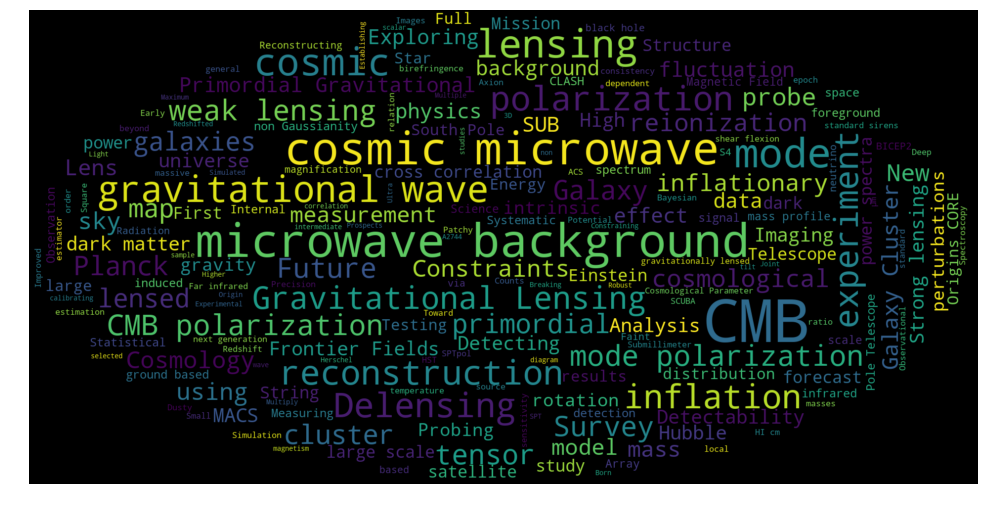

In [35]:
import matplotlib.pyplot as plt
# lower max_font_size
cmb_mask = np.array(Image.open("Planck_CMB.jpg"))

wordcloud = WordCloud(max_font_size=120,background_color="black",mask=cmb_mask).generate_from_text(' '.join(title))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

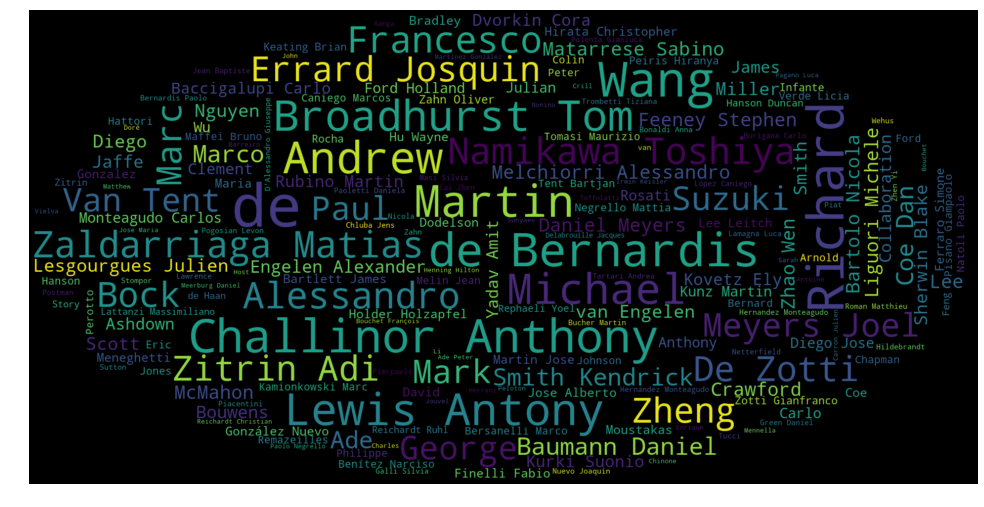

In [27]:
wordcloud = WordCloud(max_font_size=120,background_color="black",mask=cmb_mask).generate(' '.join(authors))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

We can do even better: here it counts names and last names separetly. So if there are a lot of Italians, you will see Alessandro popping out.

We can use Counter (**always use python methods they are sooo cool!**) and then the tool to generate the wordcloud from a dictionary of frequencies

In [45]:
from collections import Counter
authors_frequency = Counter(authors)


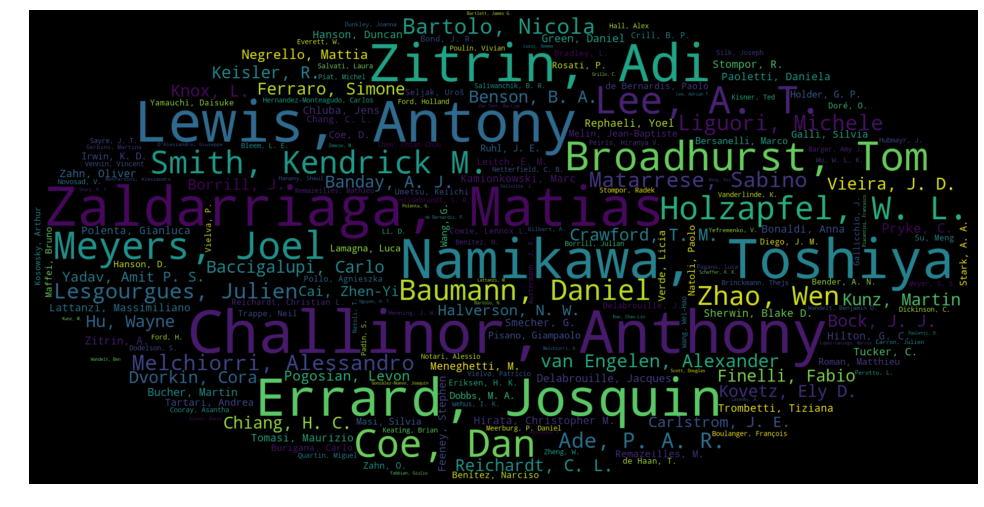

In [43]:
wordcloud = WordCloud(max_font_size=120,background_color="black",mask=cmb_mask).generate_from_frequencies(authors_frequency)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()



and the same with journals...

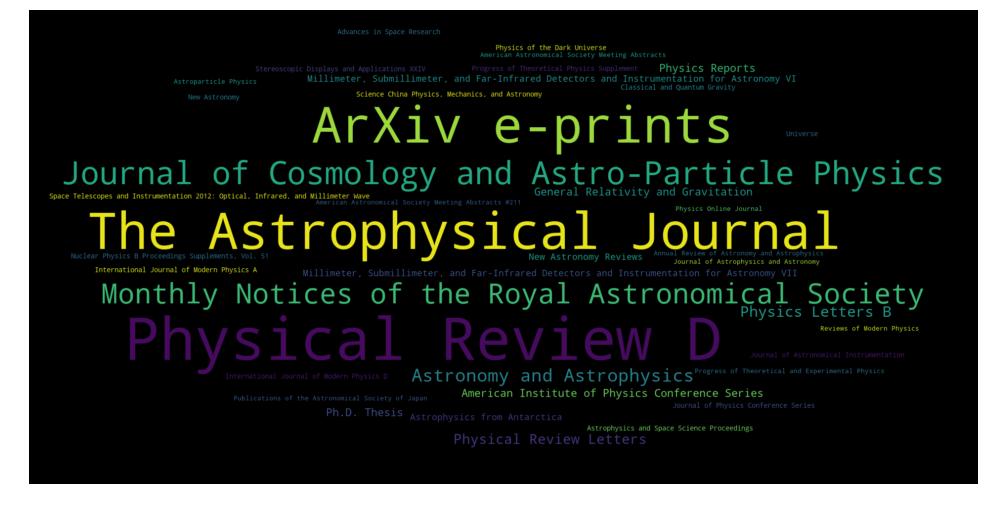

In [46]:
journal_frequency = Counter(journal)


wordcloud = WordCloud(max_font_size=120,background_color="black",mask=cmb_mask).generate_from_frequencies(journal_frequency)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [54]:
paper.read_count

/Users/alessandromanzotti/miniconda2/lib/python2.7/site-packages/ads/utils.py:31: UserWarning: You are lazy loading attributes via 'read_count', and so are making multiple calls to the API. This will impact your overall rate limits.
  UserWarning,


34

# Statistics

In [82]:
year = []
month = []
years[0].split('/')
for line in years:
    year.append(np.int(line.split('/')[0]))
    month.append(np.int(line.split('/')[1]))

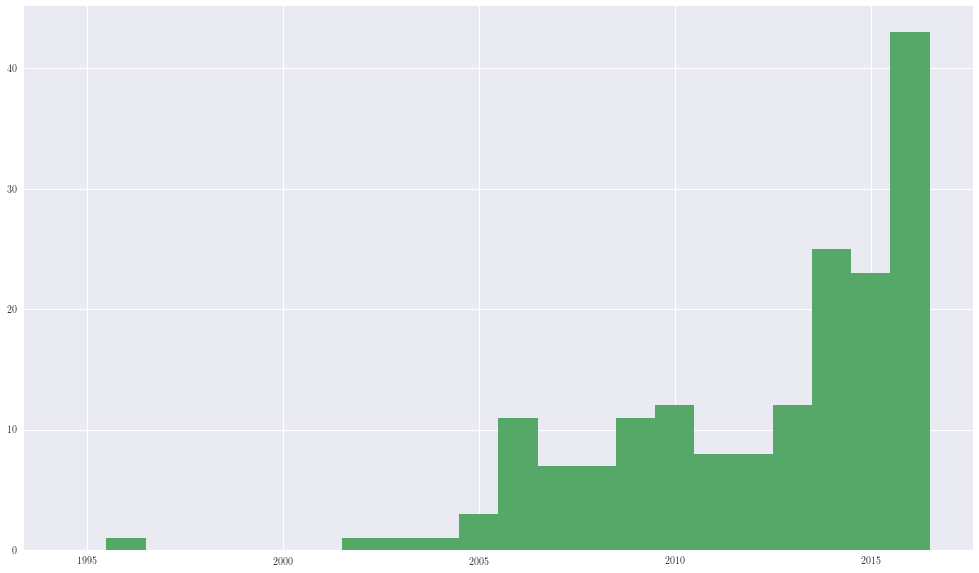

In [107]:
x = plt.hist(year,bins=np.arange(1994.5,2017.5))[0];
y = plt.hist(year,bins=np.arange(1994.5,2017.5))[1];

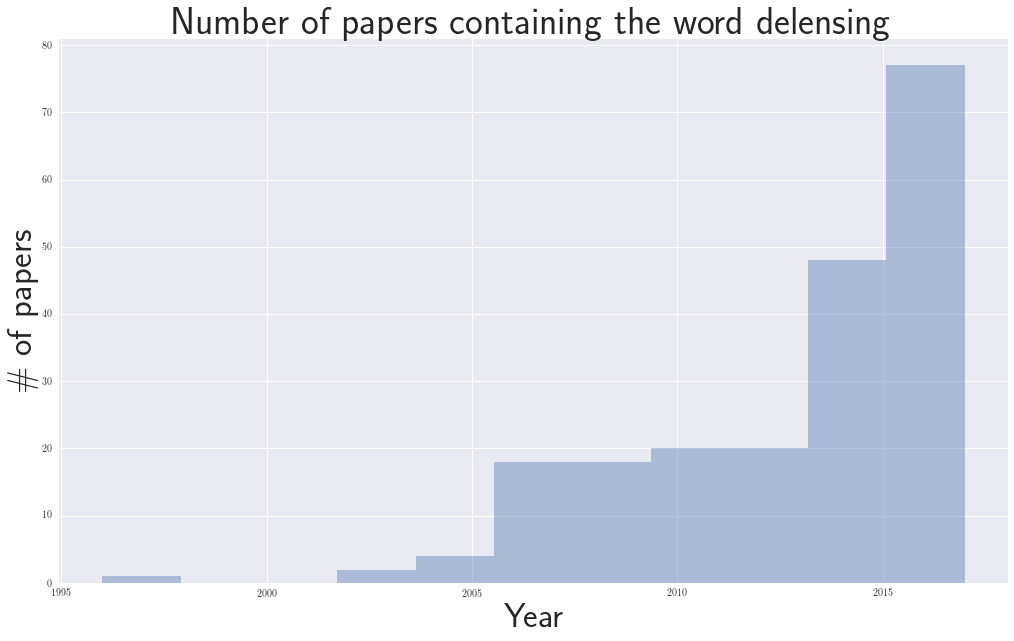

In [110]:
ax = sns.distplot(year,kde=False);
ax.set(xlabel='Year', ylabel='\# of papers',title = 'Number of papers containing the word delensing');


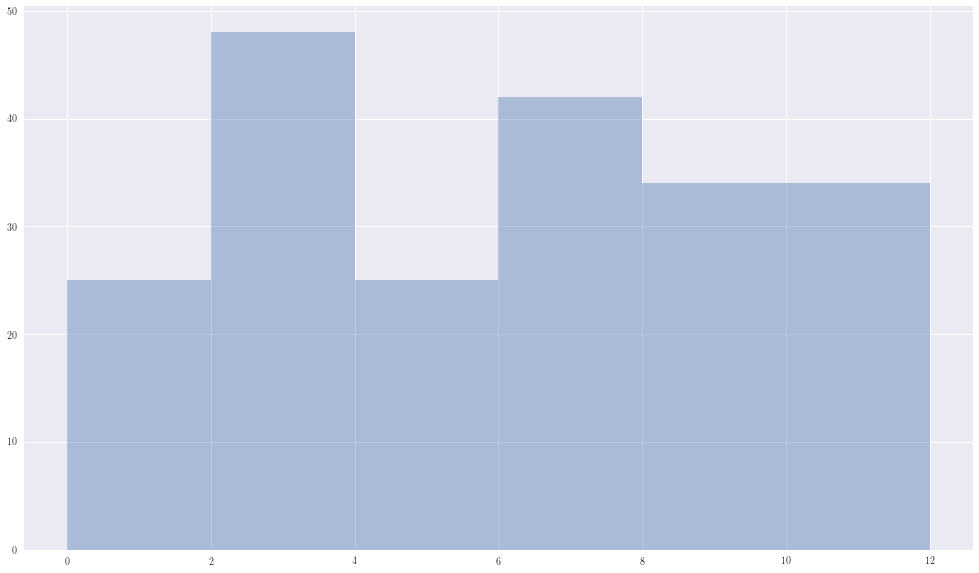

In [111]:
sns.distplot(month,kde=False);

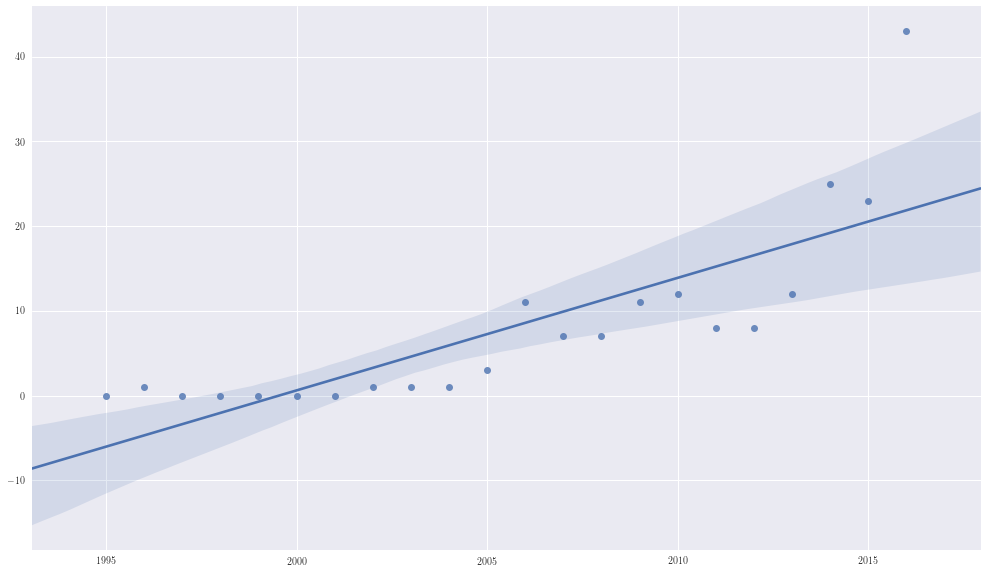

In [112]:
sns.regplot(np.arange(1995,2017), x)

In [113]:
journal_pd = pd.Series(journal)

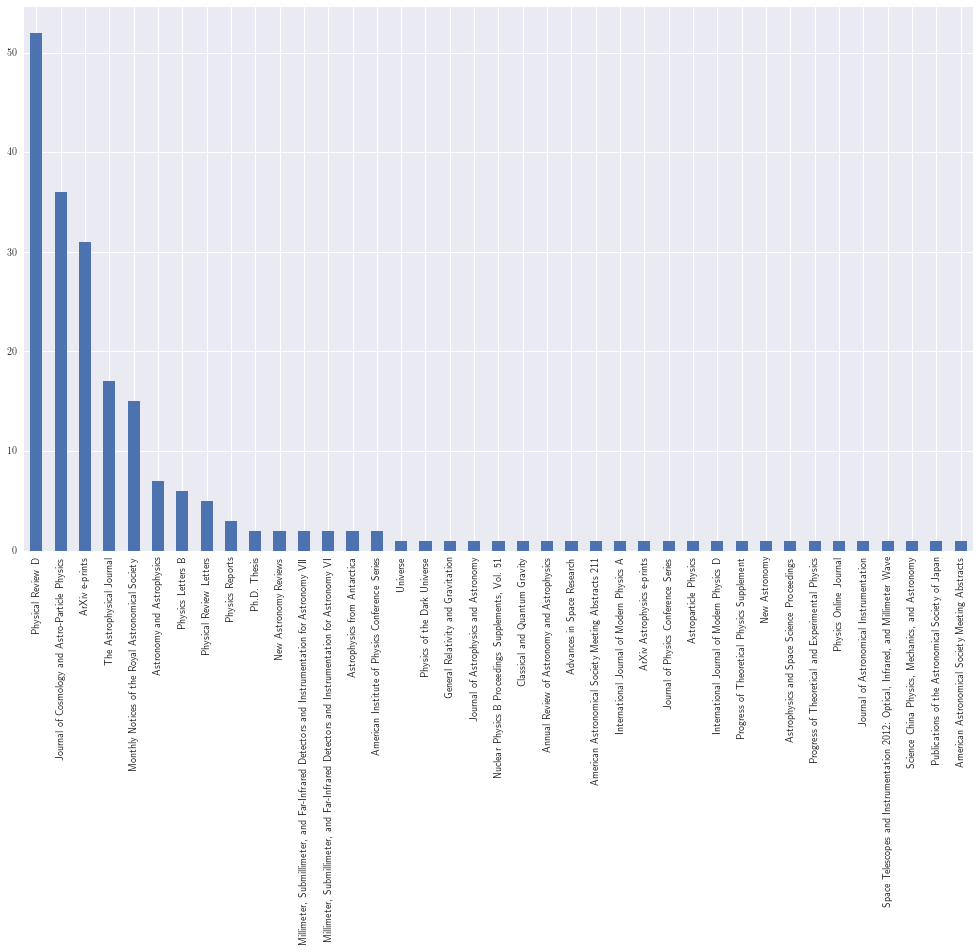

In [114]:
journal_pd.value_counts().plot(kind='bar')

In [115]:
authors_pd = pd.Series(authors)

In [116]:
authors_pd.value_counts()

Zaldarriaga, Matias\n     9
Lee, A. T. \n             8
Ade, P. A. R. \n          7
Holzapfel, W. L. \n       7
Lewis, Antony \n          7
Challinor, Anthony \n     7
Namikawa, Toshiya \n      7
Errard, Josquin \n        7
Knox, L. \n               6
Smith, Kendrick M. \n     6
Chiang, H. C. \n          6
Bartolo, Nicola \n        6
Halverson, N. W. \n       6
Lesgourgues, Julien \n    6
Baumann, Daniel \n        6
Borrill, J. \n            6
Baccigalupi, Carlo \n     6
Liguori, Michele \n       6
Verde, Licia \n           5
Hanson, D. \n             5
Chang, C. L. \n           5
Finelli, Fabio \n         5
Irwin, K. D. \n           5
Banday, A. J. \n          5
Dobbs, M. A. \n           5
Benson, B. A. \n          5
Matarrese, Sabino \n      5
Green, Daniel \n          5
Kovetz, Ely D. \n         5
Keisler, R. \n            5
                         ..
Nakayama, Kazunori \n     1
O'Brient, R. \n           1
Shimabukuro, Hayato \n    1
Quealy, Erin \n           1
Young, K. \n        

TypeError: sequence item 0: expected string, list found